<a href="https://colab.research.google.com/github/me-osama/Retail-Sales-Prediction-Regression-Project/blob/main/Retail_Sales_Prediction_(Regression_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

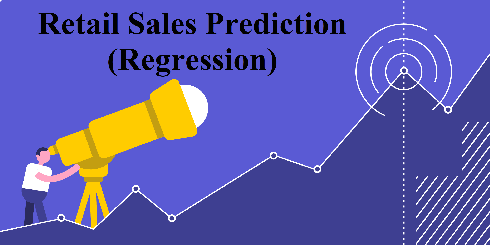

# **Project Name**    - Retail Sales Prediction (Regression)

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Md Osama

# **Project Summary -**

Rossmann, a company operating a network of over 3,000 drug stores across 7 European countries, faces the challenge of accurately predicting daily sales for up to six weeks in advance. Numerous factors contribute to the variability of store sales, such as promotions, competition, school and state holidays, seasonality, and locality. Each Rossmann store manager relies on their unique circumstances to forecast sales, resulting in varying levels of accuracy.

To address this issue, historical sales data for 1,115 Rossmann stores is provided. The objective is to forecast the "Sales" column for the test set, taking into account that certain stores in the dataset were temporarily closed for refurbishment.

# **GitHub Link -**

https://github.com/me-osama/Retail-Sales-Prediction-Regression-Project

# **Problem Statement**


**Rossmann operates an extensive network of drug stores spanning across 7 European countries, totaling more than 3,000 locations. The current responsibility assigned to Rossmann store managers entails predicting the daily sales for a period of up to six weeks in advance. The sales of these stores are influenced by a multitude of factors, which include promotions, competition, school and state holidays, seasonality, and the specific locality in which each store is situated. Due to the unique circumstances faced by individual managers, who number in the thousands, the accuracy of their sales predictions can exhibit considerable variation.**

**As part of this task, you have been granted access to historical sales data pertaining to 1,115 Rossmann stores. Your objective is to forecast the "Sales" column for the test set. It is important to note that certain stores within the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [76]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
from datetime import datetime
import scipy
import warnings    
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize':(8,6),'figure.dpi':100})

### Dataset Loading

In [6]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Load both the Dataset from the Drive
dataset_sales = pd.read_csv("/content/drive/MyDrive/Capstone_Project_Almabetter/ML_Project/Retail Sales Prediction/Rossmann Stores Data.csv")
dataset_store = pd.read_csv("/content/drive/MyDrive/Capstone_Project_Almabetter/ML_Project/Retail Sales Prediction/Store.csv")

### Dataset First View

In [8]:
#First look of sales data
dataset_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
dataset_sales.shape

(1017209, 9)

In [10]:
#First look of store data
dataset_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
dataset_store.shape

(1115, 10)

In [12]:
#Merge both the datafram and make a final datafram
merged_df = dataset_sales.merge(dataset_store, how='outer', on='Store')

#Make a copy of the final dataframe naming as df
df = merged_df.copy()

In [13]:
#First look of merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [14]:
#Shape of merged dataset
df.shape

(1017209, 18)

### Dataset Rows & Columns count

In [15]:
#Dataset Rows & Columns count
print('The number of rows in df dataframe is:',df.shape[0])
print('The number of columns in df dataframe is',df.shape[1])

The number of rows in df dataframe is: 1017209
The number of columns in df dataframe is 18


### Dataset Information

In [16]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [17]:
# Dataset Duplicate Value Count
duplicate_rows = df.duplicated().sum()
print('The number of duplicates in store data is:',duplicate_rows)

The number of duplicates in store data is: 0


#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


<Axes: >

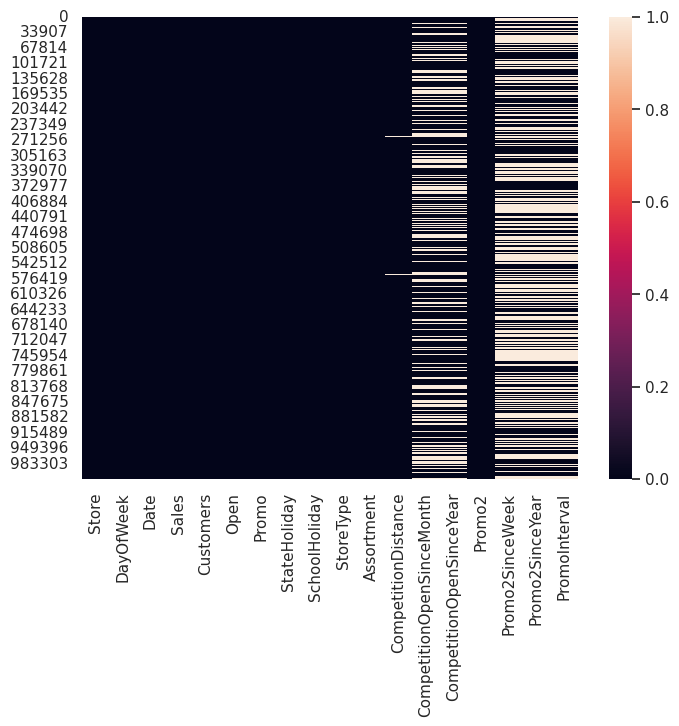

In [19]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=True)

### What did you know about your dataset?

The provided dataset corresponds to the retail industry of Rossmann, which manages an extensive network of more than 3,000 drug stores across 7 European countries. Our task involves analyzing the sales of these stores and identifying the factors that influence them. The dataset consists of 1,017,209 rows and 18 columns. While there are some missing values present, there are no duplicate values within the dataset.

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
print(df.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [21]:
# Dataset Describe
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description 

**The dataset includes the following information for each entry within the test set:**

1. Id: A unique identifier representing a (Store, Date) pair.
2. Store: A distinct identifier for each store.
3. Sales: The turnover recorded for a specific day (this is the value to be predicted).
4. Customers: The number of customers on a given day.
5. Open: An indicator (0 or 1) denoting whether the store was open or closed.
6. StateHoliday: Indicates a state holiday. Typically, most stores are closed on these days, with a few exceptions. Notably, all schools are closed on public holidays and weekends. The values are defined as follows: "a" = public holiday, "b" = Easter holiday, "c" = Christmas, "0" = None.
7. SchoolHoliday: Indicates if the (Store, Date) entry was affected by the closure of public schools.
8. StoreType: Categorizes the stores into four different models: "a," "b," "c," and "d."
9. Assortment: Describes the assortment level of a store: "a" = basic, "b" = extra, "c" = extended.
10. CompetitionDistance: Represents the distance in meters to the nearest competing store.
11. CompetitionOpenSince[Month/Year]: Provides an approximation of the month and year when the nearest competitor store opened.
12. Promo: Indicates whether a store ran a promotion on a particular day.
13. Promo2: Specifies if a store is participating in a continuing and consecutive promotion called Promo2. The values are: "0" = store is not participating, "1" = store is participating.
14. Promo2Since[Year/Week]: Describes the year and calendar week when the store started participating in Promo2.
15. PromoInterval: Describes the intervals at which Promo2 is launched, specifying the months when the promotion restarts. For example, "Feb,May,Aug,Nov" means that each cycle starts in February, May, August, and November of any given year for that store.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
for i in df.columns:
  if i in ['Sales','CompetitionDistance','Date']:
    continue
  else:
    print(f'Unique values in column {i} are',df[i].unique())

Unique values in column Store are [   1    2    3 ... 1113 1114 1115]
Unique values in column DayOfWeek are [5 4 3 2 1 7 6]
Unique values in column Customers are [ 555  546  523 ... 3727 4022 4106]
Unique values in column Open are [1 0]
Unique values in column Promo are [1 0]
Unique values in column StateHoliday are ['0' 'a' 'b' 'c' 0]
Unique values in column SchoolHoliday are [1 0]
Unique values in column StoreType are ['c' 'a' 'd' 'b']
Unique values in column Assortment are ['a' 'c' 'b']
Unique values in column CompetitionOpenSinceMonth are [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values in column CompetitionOpenSinceYear are [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in column Promo2 are [0 1]
Unique values in column Promo2SinceWeek are [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique va

In [23]:
for i in df.columns.tolist():
  print(f"Total number of unique values in {i}, is ,{df[i].nunique()}")

Total number of unique values in Store, is ,1115
Total number of unique values in DayOfWeek, is ,7
Total number of unique values in Date, is ,942
Total number of unique values in Sales, is ,21734
Total number of unique values in Customers, is ,4086
Total number of unique values in Open, is ,2
Total number of unique values in Promo, is ,2
Total number of unique values in StateHoliday, is ,5
Total number of unique values in SchoolHoliday, is ,2
Total number of unique values in StoreType, is ,4
Total number of unique values in Assortment, is ,3
Total number of unique values in CompetitionDistance, is ,654
Total number of unique values in CompetitionOpenSinceMonth, is ,12
Total number of unique values in CompetitionOpenSinceYear, is ,23
Total number of unique values in Promo2, is ,2
Total number of unique values in Promo2SinceWeek, is ,24
Total number of unique values in Promo2SinceYear, is ,7
Total number of unique values in PromoInterval, is ,3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.

In [25]:
#Check unique values in 'StateHoliday' column of the dataframe
print(df['StateHoliday'].unique())

['0' 'a' 'b' 'c' 0]


Based on the above obtained output, it is clear that the 'StateHoliday' feature includes two types of zeros: one represented as an object type and the other as an integer type. Therefore, it becomes necessary to adjust the data type of the zero value that is currently assigned incorrectly.

In [26]:
#Convert above '0' string into integer or int type
df['StateHoliday'].replace({'0':0}, inplace=True)

#Print unique
print(df.StateHoliday.unique())

[0 'a' 'b' 'c']


In [27]:
#Check unique values in 'PromoInterval' column of the dataframe
print(df['PromoInterval'].unique())

[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [28]:
#Check Unique Store types
print(df['StoreType'].unique())

['c' 'a' 'd' 'b']


In [29]:
#Categorical variables
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
categorical_variables

['DayOfWeek',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [30]:
df['Date']

0          2015-07-31
1          2015-07-30
2          2015-07-29
3          2015-07-28
4          2015-07-27
              ...    
1017204    2013-01-05
1017205    2013-01-04
1017206    2013-01-03
1017207    2013-01-02
1017208    2013-01-01
Name: Date, Length: 1017209, dtype: object

In the given df['Date'] column, the data is given in the string type. So, convert it into datetime data type.

In [31]:
#Convert 'Date' column of the dataset to a datetime data type
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Extract year, month, and day from the 'Date' column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear

In [32]:
#Extracting day from date and time
df["Day"] = df['Date'].dt.day_name()

In [33]:
#Extracting Months from date and time
df["Months"] = df["Date"].dt.month_name()

In [34]:
#Check average sale of each type of store
print('Average sale of store a is: ',df[df['StoreType'] == 'a']['Sales'].mean())
print('Average sale of store b is: ',df[df['StoreType'] == 'b']['Sales'].mean())
print('Average sale of store c is: ',df[df['StoreType'] == 'c']['Sales'].mean())
print('Average sale of store d is: ',df[df['StoreType'] == 'd']['Sales'].mean())

Average sale of store a is:  5738.179710202728
Average sale of store b is:  10058.837334175616
Average sale of store c is:  5723.6292458345515
Average sale of store d is:  5641.819243109884


In [35]:
#Counts of Store of Each Type
df.StoreType.value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [36]:
#Check Sale on weekend
sale_weekend = df.groupby(['StoreType','Day'])['Sales'].mean().reset_index()
sale_weekend.rename(columns={'Sales': 'Mean Sales on Day'}, inplace=True)
sale_weekend

,StoreType,Day,Mean Sales on Day
0,a,Friday,6648.808335
1,a,Monday,7924.611934
2,a,Saturday,5335.876841
3,a,Sunday,40.814943
4,a,Thursday,6313.106618
5,a,Tuesday,7212.646675
6,a,Wednesday,6664.173464
7,b,Friday,10529.217717
8,b,Monday,10873.392540
9,b,Saturday,7879.622114


In [37]:
#Now check Sale on each months, and try to find sale on summer vacation
sale_month_wise = df.groupby(['Months'])['Sales'].mean().sort_values()
sale_month_wise

Months
January      5465.395529
May          5489.639973
October      5537.037419
September    5570.246033
February     5645.253150
August       5693.016554
April        5738.866916
June         5760.964375
March        5784.578871
November     6008.111821
July         6064.915711
December     6826.611377
Name: Sales, dtype: float64

In [38]:
#Drop 'Months' and 'Day' column from df dataframe
df.drop(['Months','Day'], axis=1, inplace=True)

In [39]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True)  #To get higher values, sort in the descending order
store_type.rename(columns={'Sales': 'Total number of Sale'}, inplace=True)
store_type.rename(columns={'Customers': 'Total number of Customers'}, inplace=True)
store_type

,StoreType,Total number of Sale,Total number of Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


In [40]:
#Check open store
store_open = df.groupby("StoreType")["Open","StateHoliday","SchoolHoliday"].sum().reset_index()
store_open

,StoreType,Open,SchoolHoliday
0,a,457077,98413
1,b,15563,2916
2,c,112978,24653
3,d,258774,55739


In [41]:
store_assortment = df.groupby(['StoreType'])['Promo','Promo2'].count().reset_index()
store_assortment 

,StoreType,Promo,Promo2
0,a,551627,551627
1,b,15830,15830
2,c,136840,136840
3,d,312912,312912


In [42]:
#All the columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'WeekOfYear',
       'DayOfYear'],
      dtype='object')

In [43]:
#Check sales in each assortment and storetype 
sales_in_each_assortemt =df.groupby(['StoreType','Assortment'])['Sales'].sum().reset_index()
sales_in_each_assortemt

,StoreType,Assortment,Sales
0,a,a,1870105131
1,a,c,1295229728
2,b,a,71357761
3,b,b,70946312
4,b,c,16927322
5,c,a,400260421
6,c,c,382961005
7,d,a,604026757
8,d,c,1161366186


In [44]:
#Daily sales numbers over time.
sales_date = df.groupby(by='Date').agg({'Sales': 'sum'}).reset_index()
sales_date

,Date,Sales
0,2013-01-01,97235
1,2013-01-02,6949829
2,2013-01-03,6347820
3,2013-01-04,6638954
4,2013-01-05,5951593
...,...,...
937,2015-07-27,10707292
938,2015-07-28,9115073
939,2015-07-29,8499962
940,2015-07-30,8798854


In [45]:
#Check promo interval
df.PromoInterval.values

array([nan, nan, nan, ..., 'Mar,Jun,Sept,Dec', 'Mar,Jun,Sept,Dec',
       'Mar,Jun,Sept,Dec'], dtype=object)

In [46]:
#Average sales in month and year
df.groupby(['year','month'])['Sales'].mean()

year  month
2013  1        5211.555578
      2        5494.371397
      3        5820.349168
      4        5483.749836
      5        5364.127383
      6        5402.162960
      7        6042.062260
      8        5729.574049
      9        5322.988430
      10       5429.258788
      11       5864.601614
      12       6703.618140
2014  1        5431.875799
      2        5731.091512
      3        5584.257312
      4        5815.993333
      5        5632.670534
      6        5681.526188
      7        5999.403381
      8        5649.421252
      9        5865.104029
      10       5665.564878
      11       6179.249661
      12       6973.282456
2015  1        5752.747866
      2        5710.296541
      3        5949.130132
      4        5916.857578
      5        5472.122002
      6        6199.203976
      7        6142.705511
Name: Sales, dtype: float64

In [47]:
#Now, exploring store types along with assortment , state holiday and avg sales according to mean or average
df.groupby(['StoreType','Assortment','StateHoliday'])['Sales'].mean()

StoreType  Assortment  StateHoliday
a          a           0                5568.329797
                       a                  99.287144
                       b                   0.000000
                       c                   0.000000
           c           0                6498.024887
                       a                 149.526042
                       b                  76.975113
                       c                  19.907277
b          a           0               10796.756580
                       a               11918.106796
                       b               12901.809524
                       c                9369.500000
           b           0                8465.878626
                       a               11276.294798
                       b               11846.740741
                       c               10276.058824
           c           0               17958.629630
                       a               18410.142857
                       b    

### What all manipulations have you done and insights you found?

Upon thoroughly examining the dataset, we meticulously analyzed each variable and uncovered a significant correlation between the target variable, sales, and the independent predictor variables. Our investigation led us to identify four distinct types of stores, with type-a stores being the most prevalent while type-b stores were the least common. Surprisingly, despite their lower numbers, type-b stores exhibited the highest average sales.

However, when considering the overall sales, type-a stores emerged as the top performers. A closer examination of customer data segmented by store type revealed that type-a stores attracted the highest number of visits, indicating a larger customer base.

Naturally, we became intrigued by the exceptionally high sales of type-a stores. To delve deeper into this phenomenon, we conducted further investigations and uncovered that type-a stores not only outnumbered other types but also boasted a larger customer base. Additionally, our analysis of store assortment unveiled that type-b stores had the lowest assortment level, while type-a stores offered the highest variety of products. Furthermore, it became evident that type-b assortments contributed minimally to the overall sales, as indicated below.

In [48]:
sales_in_each_assortemt

,StoreType,Assortment,Sales
0,a,a,1870105131
1,a,c,1295229728
2,b,a,71357761
3,b,b,70946312
4,b,c,16927322
5,c,a,400260421
6,c,c,382961005
7,d,a,604026757
8,d,c,1161366186


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Donut chart on Independant Variable Assortment (Univariate)

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64


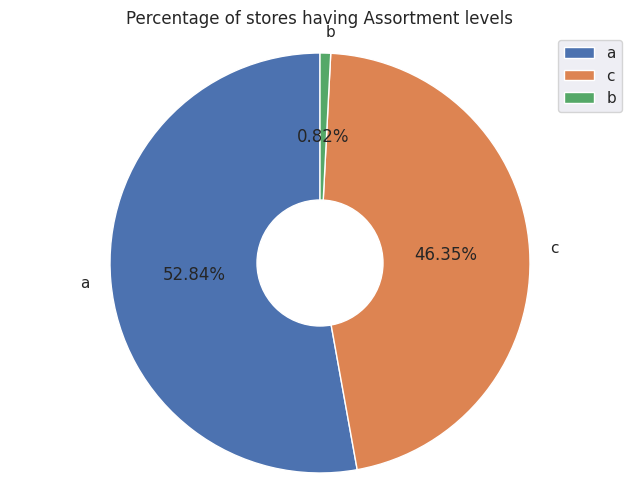

In [49]:
# Chart - 1 visualization code
# Display value counts
print(df.Assortment.value_counts())

# Dependent Variable Column Visualization
assortment_counts = df['Assortment'].value_counts()
labels = assortment_counts.index
fig, ax = plt.subplots()
ax.pie(assortment_counts, labels=labels, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.30, fc='white')
fig.gca().add_artist(center_circle)

# Add a title and legend
ax.set_title('Percentage of stores having Assortment levels')
ax.legend(labels, loc='best')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

I choosed a donut chart due to its capacity to simplify intricate data by breaking it down into smaller, easily understandable slices. This visualization technique aids in comprehending complex information more effectively. Furthermore, the donut chart is particularly well-suited for displaying categorical features, making it a suitable choice for this specific context.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart provided above, the following insights can be derived:

- 52.8% of the stores implement a basic type assortment strategy (denoted by 'a').
- 46.3% of the stores adopt an extended type assortment strategy (denoted by 'c').
- Only 0.8% of the stores utilize an extra type assortment strategy (denoted by 'b'). It is evident that the majority of the stores prioritize either a basic or extended assortment strategy.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In the field of retailing, an assortment strategy refers to the process of selecting and displaying a specific number and type of products for customers to purchase in a store. Notably, there has been a noticeable upward trend in the adoption of both basic (a) and extended (c) assortment strategies. This positive growth can be attributed to the fact that stores implementing these strategies generally observe favorable sales growth. On the contrary, stores that employ the extra type assortment strategy (b) tend to experience a decline in sales. As a result, it can be inferred that the majority of stores are not inclined towards utilizing the extended (c) assortment strategy.

#### Chart - 2 Donut chart on StoreType (Univariate) Independent variable

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64


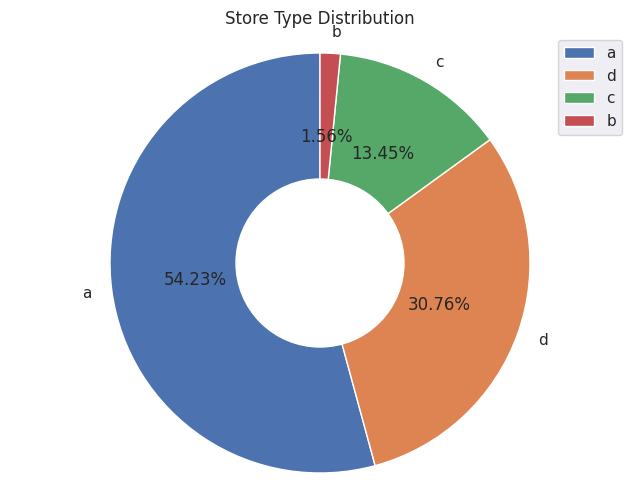

In [59]:
#Chart - 2 visualization code
# Display value counts
print(df.StoreType.value_counts())

# Calculate the percentage for each category
percentages = df['StoreType'].value_counts(normalize=True) * 100

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(percentages, labels=percentages.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Add a circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Set a title and legend for the chart
ax.set_title('Store Type Distribution')
ax.legend(labels=percentages.index)

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

The purpose of using a donut chart in this case is to visually represent the distribution of different 'StoreType' categories while also displaying the percentage values for each category. The hole in the center of the donut chart allows for additional information to be displayed, such as a legend or a title.

By using a donut chart, I can effectively convey both the relative proportions of each category and the corresponding percentage values in a single chart. This can be helpful in understanding the distribution and relative importance of different categories in a concise and visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?

I found the following insights from the above chart.
- 54.23% of the stores belong to Type 'a' Store model.
- 30.76% of the stores belong to Type 'd' Store model.
- 13.45% of the stores belong to Type 'c' Store model.
- 1.56% of the stores belong to Type 'b' Store model.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In the dataset, the stores are categorized into four different types. It is evident that Type 'a' has the highest number of stores. However, this analysis does not provide insights into the sales growth. In future analyses, we will explore the sales growth and its related factors

#### Chart - 3 Pie chart to see percentage of open or close stores (Univariate)

1    844392
0    172817
Name: Open, dtype: int64


<Axes: title={'center': 'StateHoliday Types'}, ylabel='Open'>

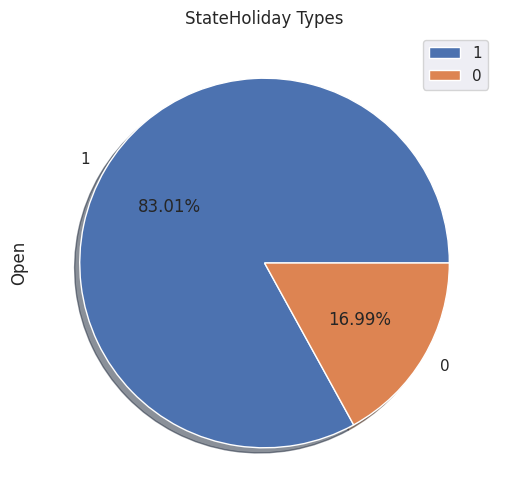

In [66]:
# Chart - 3 visualization code
#Number of open and closed stores
print(df['Open'].value_counts())

#Pie chart to see percentage of open and closed stores
df['Open'].value_counts().plot.pie(title='StateHoliday Types', legend=True, autopct='%1.2f%%', shadow=True)

##### 1. Why did you pick the specific chart?

A pie chart is a suitable choice for visualizing the distribution of open and closed stores in the given data. This chart type presents data in a circular format, with each category represented as a sector of the chart. By using a pie chart, we can easily understand the proportion of open and closed stores relative to the total number of stores. The circular shape helps convey the whole dataset, emphasizing the relationship between different categories. Additionally, the use of labels on the sectors provides clear identification of whether a store is open or closed, enabling easy interpretation of the chart without the need for a separate legend.

##### 2. What is/are the insight(s) found from the chart?

In the above insight "1" stands for open stores, and "0" stands for closed stores. In the above pie chart we can see that 83.01% of stores are open and 16.99% of stores are closed. The open stores are generating sales and the closed stores are closed due to state holidays, school holidays or temporary closures for refurbishment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The 'Open' feature in the dataset provides information about the operational status of the stores, indicating whether they are open or closed. Based on the available data, it is observed that approximately 83% of the stores are marked as open, which signifies a positive business impact. This high percentage suggests that the majority of Rossmann's operations are active and generating sales. On the other hand, approximately 17% of the stores are recorded as closed. The closures could be attributed to various factors such as state holidays, school holidays, or temporary closures for refurbishment. These closures might have an impact on Rossmann's overall sales performance, as they represent a significant portion of the company's store network. To gain deeper insights into the sales dynamics, further analysis will be conducted to explore the potential influence of other factors on Rossmann's sales performance.

#### Chart - 4 Bar Plot of categorical variable the basis of Sales (Bivariate)

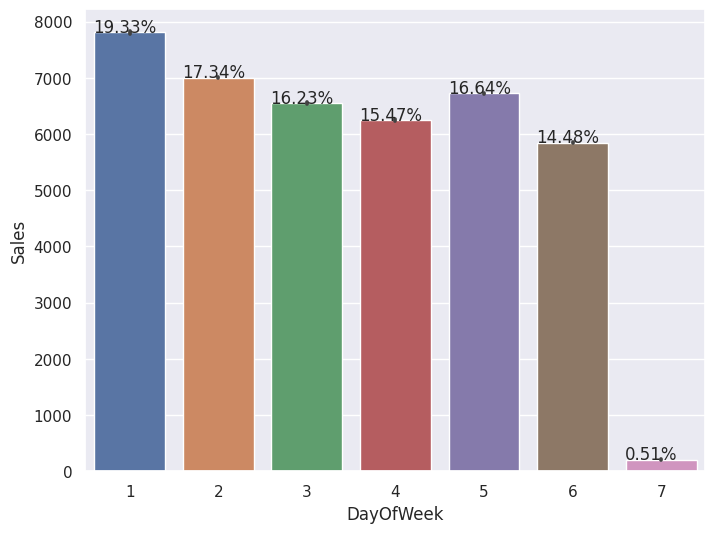

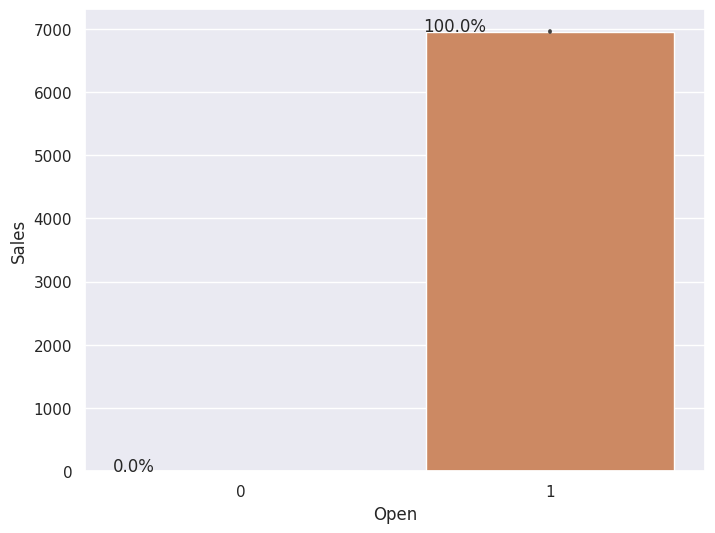

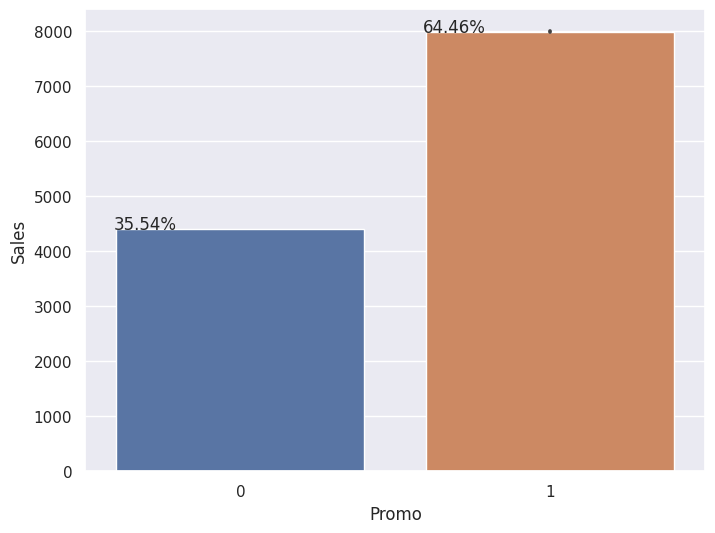

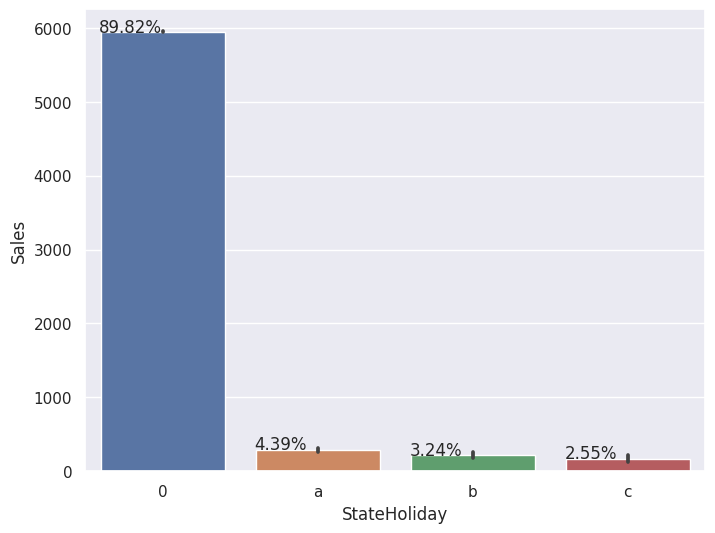

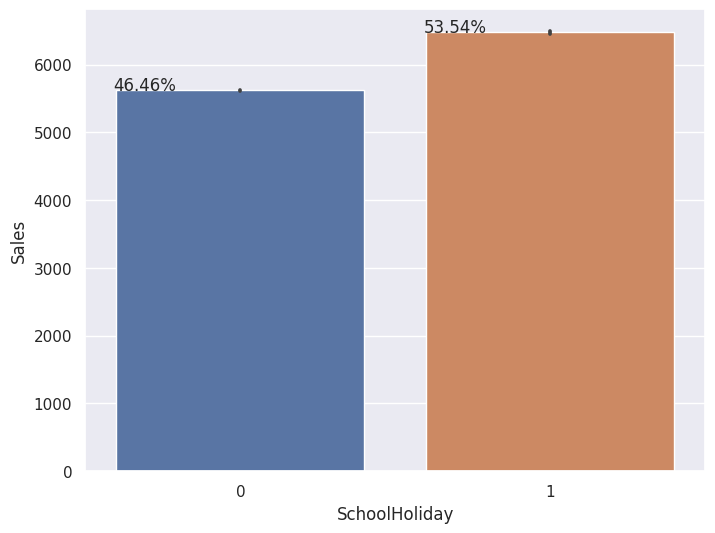

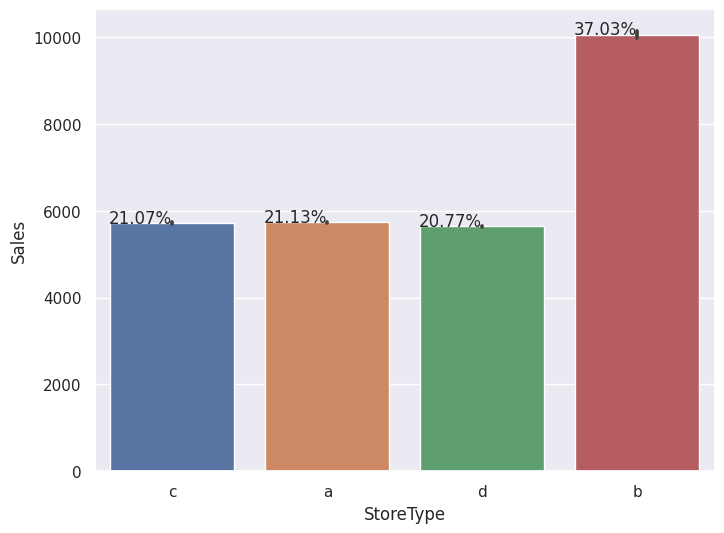

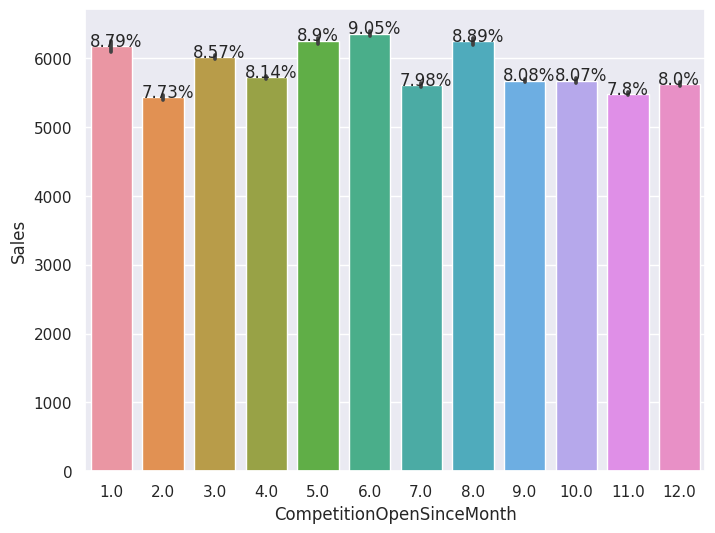

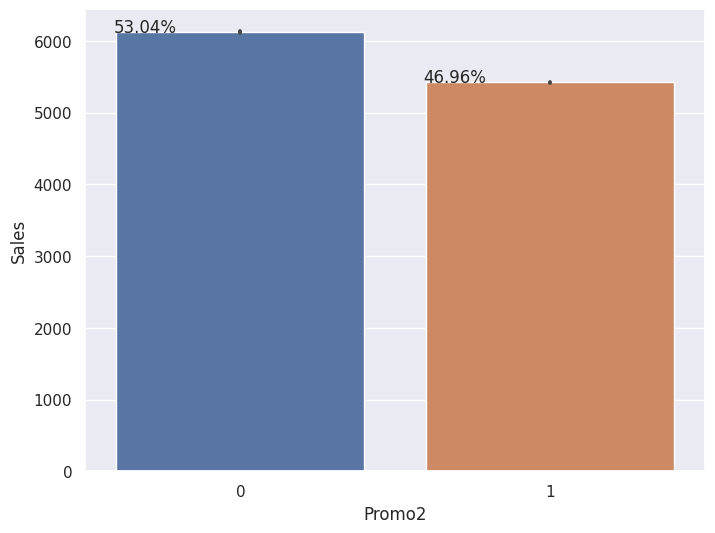

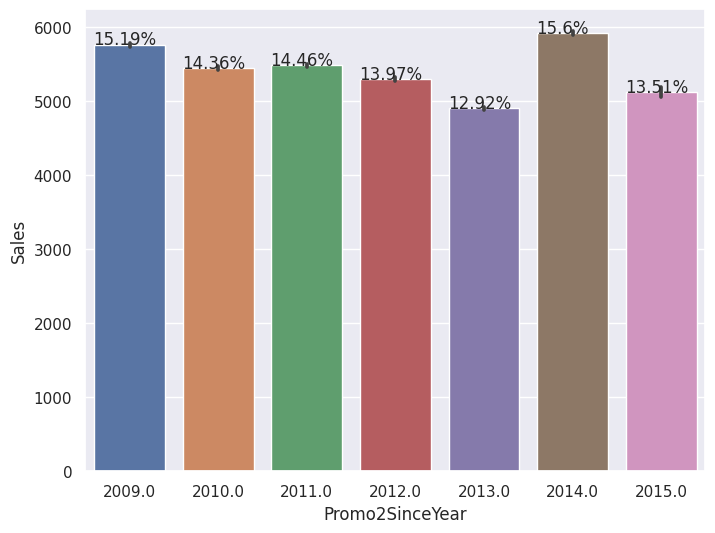

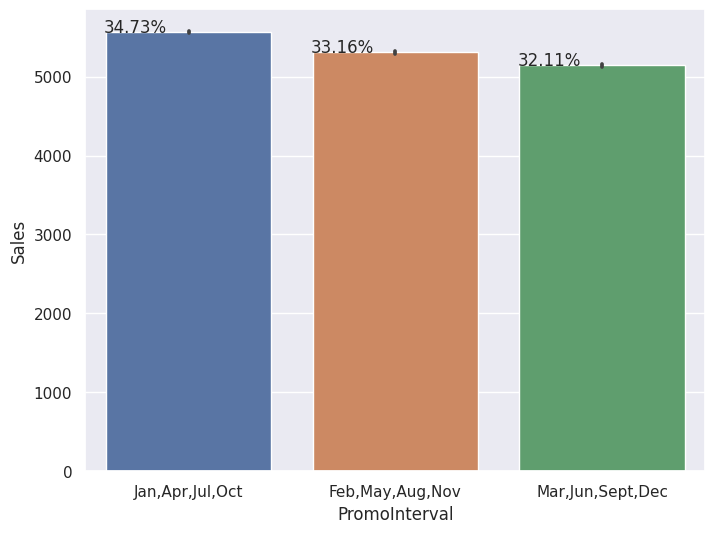

In [69]:
# Chart - 4 visualization code
#A list of various categorical variables.
independent_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']

#Create a bar plot for each independent variable in a DataFrame, with the y-axis representing the 'Sales' variable
for var in independent_variables:
  ax = sns.barplot(x=df[var], y=df['Sales'])
  #Now  show percentage at bar plot
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
      total = sum(totals)

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)

  plt.show()

##### 1. Why did you pick the specific chart?

We chossed to use bar plot for this analysis as it is a powerful tool for comparing and visually representing different categories of data while displaying precise values. In our specific scenario, we are examining the relationship between various categorical variables and the target variable, Sales, with the aim of assessing the influence of each variable on the sales performance of Rossmann stores. By employing a bar plot, we can effectively evaluate and compare the impact of different categorical variables on sales, gaining insights into the factors that contribute to the success of Rossmann stores

##### 2. What is/are the insight(s) found from the chart?

We conducted a thorough analysis by comparing various categorical variables to gain insights from the plots:

**Day of Week vs Sales:** We observed that sales are highest on Mondays (19.3%) and lowest on Sundays (0.51%). This indicates that many stores are closed on Sundays, leading to lower sales.

**Promo vs Sales:** Stores offering promotions or discounts have higher sales, accounting for 64.46% of total sales. In contrast, stores not offering promotions only contribute to 35.54% of total sales.

**State Holiday vs Sales: **There are four categories for state holidays: 0 (no holiday), a (public holiday), b (Easter holiday), and c (Christmas). We found that sales are relatively low on Christmas (2.55%), suggesting that fewer stores are open on that day, resulting in decreased sales.

**School Holiday vs Sales:** Analyzing the effect of school holidays on sales, we found that stores closed for school holidays experience a sales decrease of 46.46%. However, compared to state holidays, more stores tend to be open during school holidays, leading to higher sales.

**Store Type vs Sales:** Rossmann chain has four store types: "a," "b," "c," and "d." Comparing the average sales percentage for each type, we observed that "a" stores have the highest average sales at 37.03%, while the other store types have relatively similar average sales.

Competition Open Since Month vs Sales: The data reveals that sales peak in June, indicating fewer competing stores open during that month. Increased competition tends to result in decreased sales for a particular store.

**Promo 2 vs Sales:** Stores participating in Promo 2, offering discounts, account for 46.96% of total sales, while stores not participating in Promo 2 contribute to 53.04% of total sales, indicating a negative growth in sales.

**Competition Open Since Year vs Sales: **Sales were high in 2014, suggesting fewer competing stores open during that year.

**Promo Interval vs Sales:** Promo Interval refers to consecutive intervals in Promo 2. Stores not participating in any interval have the highest average sales. Among stores participating in the Promo Interval, the first interval (Jan, Apr, Jul, Oct) exhibits the highest average sales compared to the other intervals.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On Mondays, sales show a notable increase, indicating the importance of leveraging sales data to effectively manage inventory and avoid stock shortages, thereby fostering a positive business impact.

Promotional activities contribute to higher sales and foster positive growth within the business.

Christmas negatively affects sales, potentially due to the reduced number of open stores on that day.

School holidays tend to have a negative impact on sales, likely due to decreased overall sales during these periods.

Store type 'b' demonstrates a positive impact on sales as it comprises fewer stores but achieves higher average sales compared to other store types. Conversely, store type 'a' experiences a negative impact due to a larger number of stores with comparatively lower average sales.

Stores participating in promo 2 exhibit lower sales, resulting in negative growth and a negative business impact.

In 2014, there was less competition, leading to positive growth in sales and a favorable business impact. Conversely, sales declined from 2009 to 2013, suggesting an increase in competition during that period.

Among the promo intervals, the first interval (Jan, Apr, Jul, Oct) shows the highest average sales, contributing to positive growth in sales.

#### Chart - 5 Box Plot of Assortment on the basis of Sales (Bivariate)

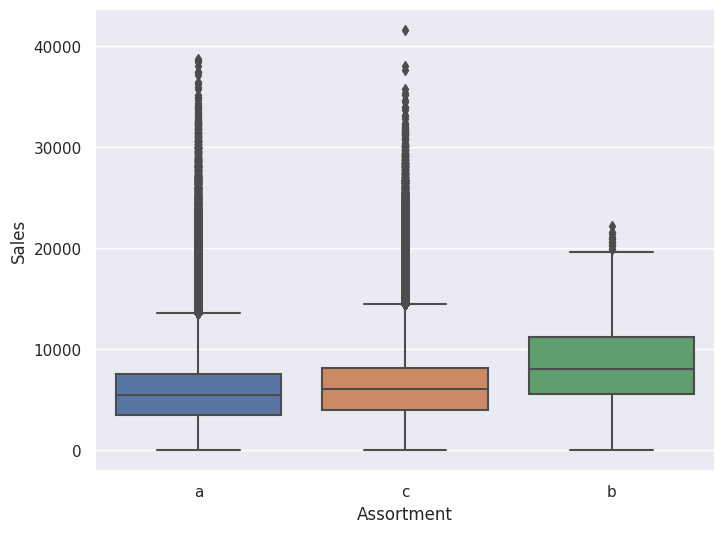

In [70]:
# Chart - 5 visualization code
#Show box plot (use 'Assortment' in x axis and 'Sales' in y axis)
sns.boxplot(x=df['Assortment'],y=df['Sales'])
plt.show()

##### 1. Why did you pick the specific chart?

The box plot is a valuable and informative visual representation that allows for the concise summary and comparison of one or multiple data sets. Its effectiveness lies in its ability to quickly summarize and compare outcomes from different experiments or scenarios. In the present context, we utilize box plots to effortlessly compare the sales performance of each assortment strategy by examining their respective 5-point summary, which encompasses:

Median Value: This represents the middle value of the data, dividing it into two equal halves. It provides a measure of the central tendency.

Lower Quartile (Q1): This indicates the value below which 25% of the data points fall. It provides insights into the lower range of the data.

Upper Quartile (Q3): This signifies the value below which 75% of the data points fall. It offers insights into the upper range of the data.

Highest Value: This represents the maximum value observed in the data set, providing information on the upper extreme.

Lowest Value: This denotes the minimum value observed in the data set, offering information on the lower extreme.

By examining these components within the box plot, we can easily compare the assortment strategies and gain valuable insights into their sales performance.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the plot, the following observations can be made:

Median Sales Value: The b type assortment exhibits the highest median sales value compared to the other assortment types.

Highest Sale Value: The c type assortment records the highest sales among all the assortment levels.

Maximum Sales Count: The maximum number of sales for any assortment strategy does not surpass 10,000 sales. Moreover, both the a and c type assortment strategies display a notable number of outliers in their sales data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In the retail industry, an assortment strategy pertains to the selection and arrangement of products that a store offers for sale. By examining the aforementioned plot, retailers can gain insights into which assortment strategies are more likely to result in positive sales growth. Notably, the b:Extra assortment strategy stands out as a promising option, indicating that implementing this strategy can potentially lead to significant growth in sales for the retailer.

#### Chart - 6 Scatter plot between Sales and competition distance on the basis of Multivariate Store Type

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

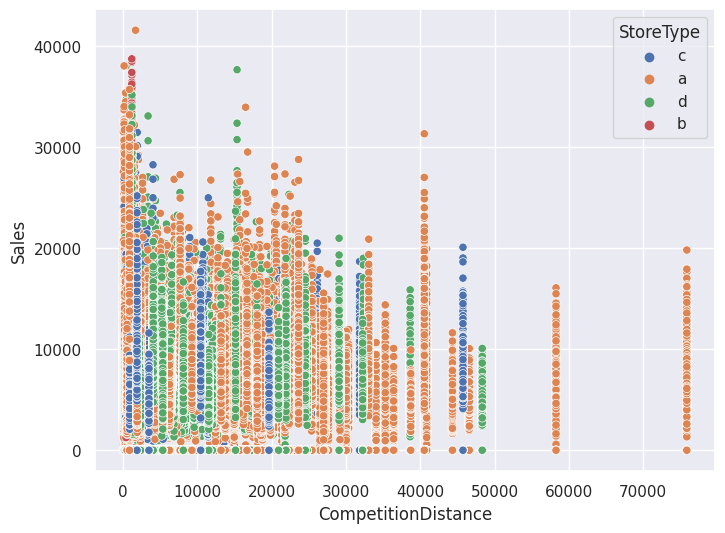

In [75]:
# Chart - 6 visualization code
#Show scatter plot between Sales and CompetitionDistance
x = 'Sales'
y = 'CompetitionDistance'
sns.scatterplot(data=df, x=y, y=x, hue='StoreType')

##### 1. Why did you pick the specific chart?

In this analysis, we have used a scatter plot to effectively examine the correlation between two numerical variables. By plotting sales against competition distance, we aim to discern any potential relationship or patterns between these two factors. The scatter plot provides a visual representation that allows us to observe the distribution and clustering of data points, enabling us to gain insights into the potential impact of competition distance on sales.

##### 2. What is/are the insight(s) found from the chart?

In this analysis, it is evident that as competition distances decrease, indicating stores located in close proximity to each other, sales reach their peak. This observation may be attributed to the potential effect of intensified competition among stores. Lower competition distances could lead to competitive pricing strategies, attracting a larger customer base and ultimately resulting in higher sales. The proximity of competing stores may create a favorable environment for customers to compare prices and make purchase decisions, driving increased sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above plot holds the potential to generate a positive business impact for Rossmann. By visually examining the relationship between the distance between stores and their respective sales, managers can gain a clear understanding of how this factor influences the overall sales performance. This knowledge enables them to make informed decisions regarding store locations, such as identifying optimal distances between stores to maximize sales potential. By strategically managing store placement based on the insights gained from the plot, Rossmann can enhance its sales performance and drive positive business outcomes.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***